# import

In [ ]:
!pip install dcor

In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 5.8 MB/s eta 0:00:00


In [ ]:
!pip install xgboost scikit-learn

In [ ]:
!pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 1.4 MB/s eta 0:00:00


In [ ]:
!pip install lightgbm

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.metrics import mean_squared_error as MSE, r2_score as r2, root_mean_squared_error as RMSE, make_scorer, mean_squared_log_error
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import LeaveOneOut
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, OneHotEncoder, TargetEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.compose import ColumnTransformer
from scipy.stats import spearmanr
from dcor import distance_correlation
from scipy.stats import loguniform, randint
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor
import category_encoders as ce
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.ensemble import StackingRegressor

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_test = pd.read_csv('/content/drive/MyDrive/machine_learning/2_verifica_intermedia/test.csv')

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/machine_learning/2_verifica_intermedia/train.csv')

# EDA

## Info e descrizione

Il dataset e gia normalizzato e pulito

In [ ]:
df.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,id
0,2,1,6,9,0,6,0,1,0.60,0.6061,0.60,0.0896,367,1
1,2,0,3,11,0,2,1,1,0.44,0.4394,0.51,0.3284,86,2
2,1,0,2,3,0,2,1,2,0.16,0.2273,0.69,0.0000,2,3
3,2,0,6,8,0,2,1,1,0.58,0.5455,0.49,0.3881,486,4
4,3,1,7,6,1,3,0,1,0.66,0.6212,0.69,0.0000,32,5


In [ ]:
df.describe()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,id
count,13903.000000,13903.000000,13903.000000,13903.000000,13903.000000,13903.000000,13903.000000,13903.000000,13903.000000,13903.000000,13903.000000,13903.000000,13903.000000,13903.000000
mean,2.507229,0.500683,6.544775,11.580810,0.029346,3.009926,0.682227,1.424009,0.496982,0.475797,0.626834,0.190275,189.909588,6952.000000
std,1.109558,0.500018,3.438904,6.911035,0.168781,2.007908,0.465627,0.641639,0.193043,0.172451,0.192875,0.122527,181.682589,4013.594731
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,40.000000,3476.500000
50%,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.620000,0.194000,143.000000,6952.000000
75%,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,281.000000,10427.500000
max,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,0.984800,1.000000,0.850700,977.000000,13903.000000


In [ ]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
13898,False
13899,False
13900,False
13901,False


In [ ]:
df.isnull().sum()

,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0
atemp,0


## Correlazione e HeatMap

Notiamo una forte corelazione tra temp e atemp

In [ ]:
df.corr()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,id
season,1.000000,-0.014887,0.835365,-0.010608,-0.004206,-0.000226,0.010294,-0.003245,0.309178,0.316996,0.160476,-0.153687,0.173990,0.014228
yr,-0.014887,1.000000,-0.018832,-0.002165,0.004876,-0.004664,-0.000612,-0.015813,0.041694,0.039730,-0.085450,-0.009616,0.255266,0.004895
mnth,0.835365,-0.018832,1.000000,-0.008668,0.022274,0.011457,-0.007196,0.011950,0.204006,0.210606,0.173343,-0.140962,0.116430,0.011721
hr,-0.010608,-0.002165,-0.008668,1.000000,-0.000122,-0.003666,-0.000983,-0.024946,0.137967,0.134369,-0.275699,0.133950,0.390555,-0.002245
holiday,-0.004206,0.004876,0.022274,-0.000122,1.000000,-0.104652,-0.254771,-0.021252,-0.026247,-0.029627,-0.012989,-0.000942,-0.029407,0.005924
weekday,-0.000226,-0.004664,0.011457,-0.003666,-0.104652,1.000000,0.035919,0.007397,0.000924,-0.005940,-0.035166,0.011829,0.029814,0.014639
workingday,0.010294,-0.000612,-0.007196,-0.000983,-0.254771,0.035919,1.000000,0.053275,0.050965,0.050109,0.020204,-0.011532,0.023391,-0.001838
weathersit,-0.003245,-0.015813,0.011950,-0.024946,-0.021252,0.007397,0.053275,1.000000,-0.098207,-0.101615,0.415633,0.024156,-0.140859,-0.002515
temp,0.309178,0.041694,0.204006,0.137967,-0.026247,0.000924,0.050965,-0.098207,1.000000,0.987050,-0.068250,-0.019189,0.405337,0.013852
atemp,0.316996,0.039730,0.210606,0.134369,-0.029627,-0.005940,0.050109,-0.101615,0.987050,1.000000,-0.051178,-0.058450,0.401524,0.014534


<Axes: >

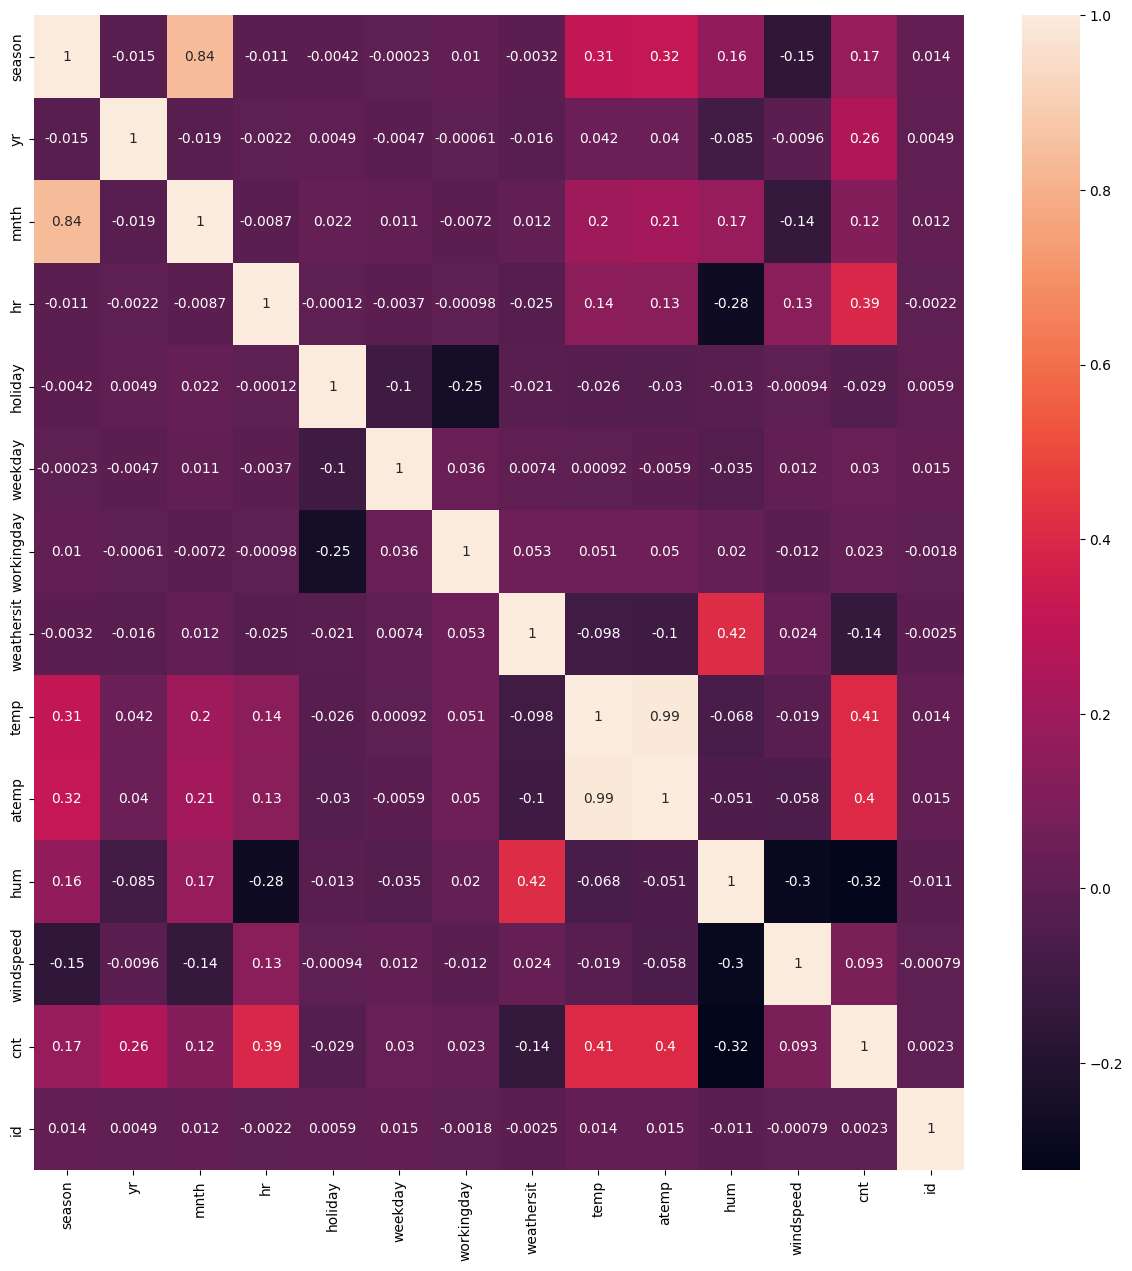

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), annot=True)

In [ ]:
df["yr"].value_counts()

,count
yr,
1,6961
0,6942


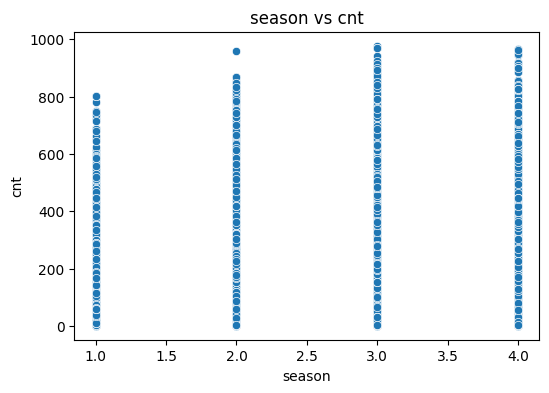

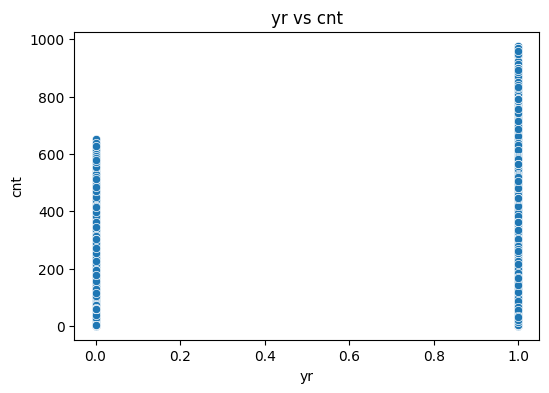

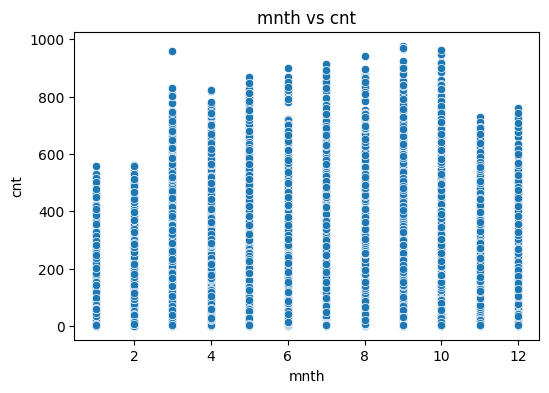

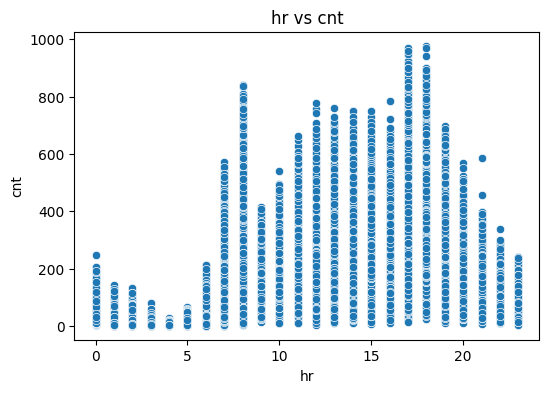

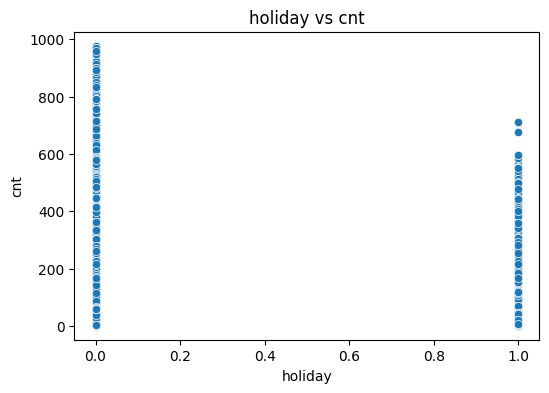

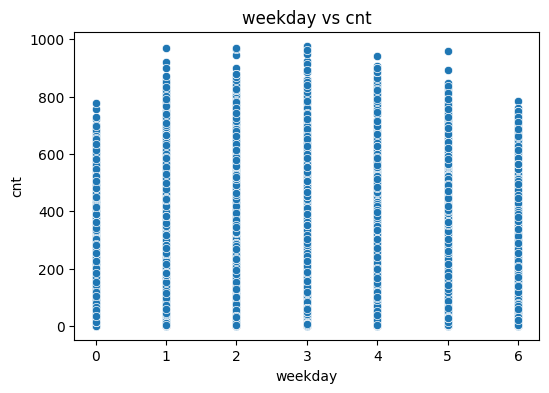

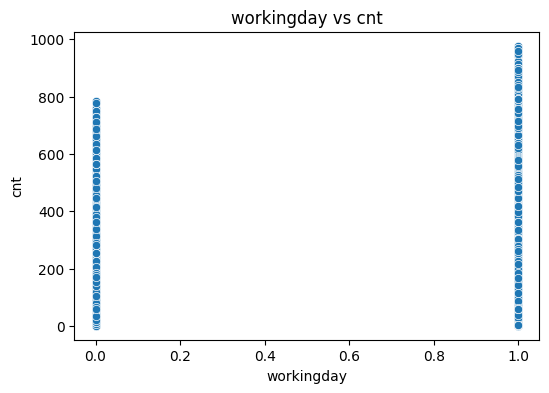

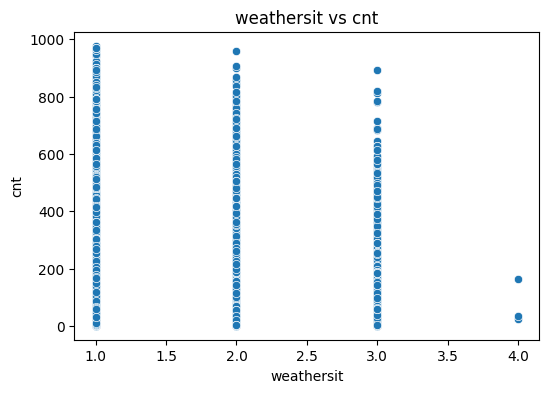

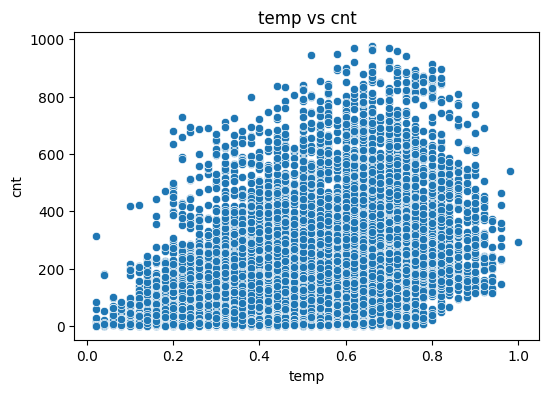

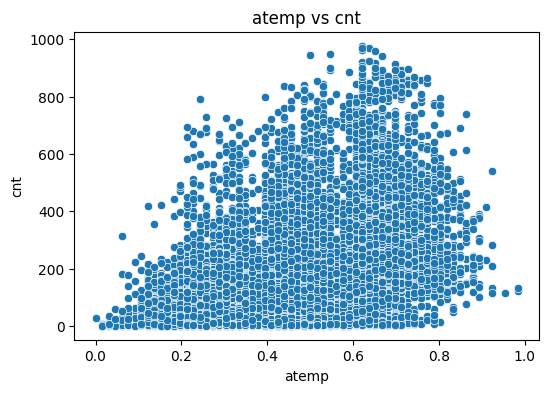

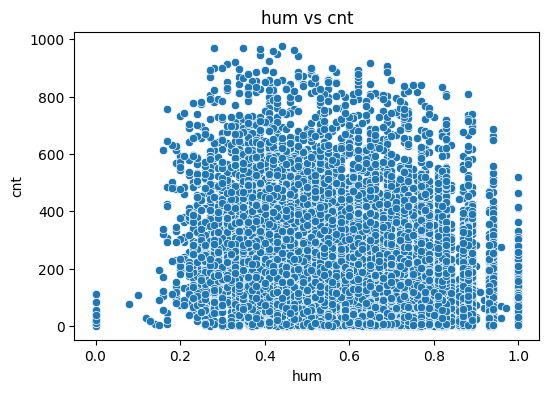

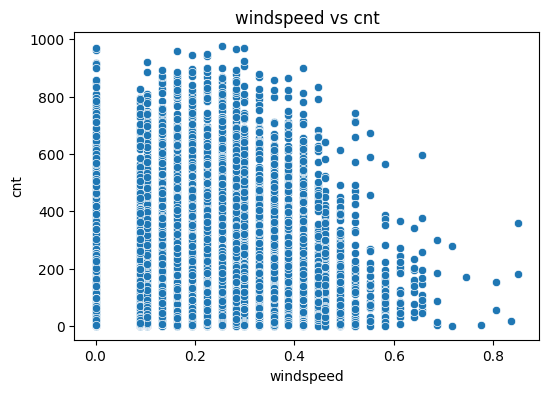

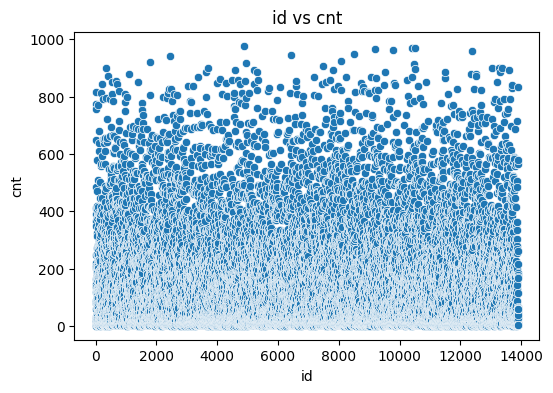

In [ ]:
for col in df.columns:
    if col != "cnt":
        plt.figure(figsize=(6, 4))
        sns.scatterplot(x=df[col], y=df["cnt"])
        plt.title(f"{col} vs cnt")
        plt.show()

<BarContainer object of 13903 artists>

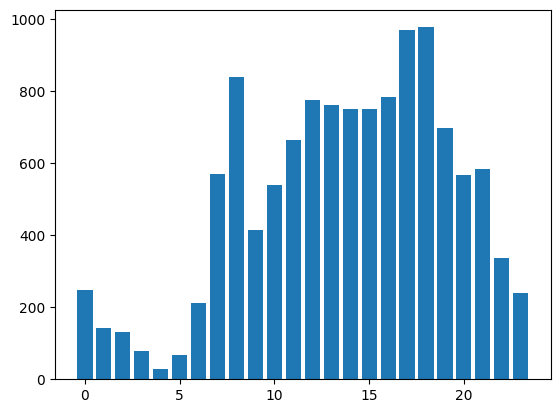

In [ ]:
plt.bar(df["hr"], df["cnt"])

<BarContainer object of 13903 artists>

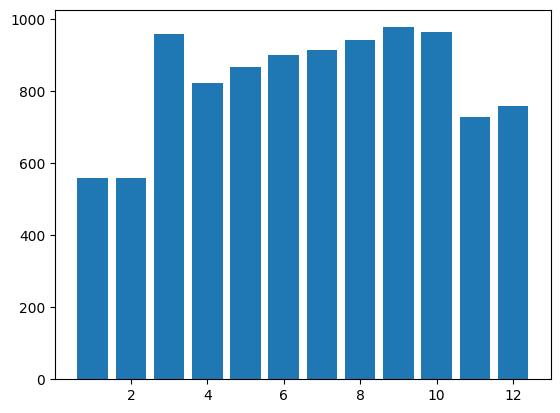

In [ ]:
plt.bar(df["mnth"], df["cnt"])

## Correlazione non lineare

Non notimo nessun valore interessante

In [ ]:
X = df.drop(columns= ["cnt","id"])
y = df["cnt"]

In [ ]:
results = []

for col in X.columns:

    spearman_corr, _ = spearmanr(X[col], y)


    dist_corr = distance_correlation(X[col], y)

    lin_corr = np.corrcoef(X[col], y)[0,1]

    results.append({
        "Feature": col,
        "Spearman": spearman_corr,
        "DistanceCorr": dist_corr,
        "corr": lin_corr
    })

# Create a results DataFrame
corr_df = pd.DataFrame(results).sort_values("DistanceCorr", ascending=False)

print(corr_df)

/usr/local/lib/python3.12/dist-packages/dcor/_fast_dcov_avl.py:554: UserWarning: Falling back to uncompiled AVL fast distance covariance terms because of TypeError exception raised: No matching definition for argument type(s) array(int64, 1d, C), array(int64, 1d, C), bool. Rembember: only floating point values can be used in the compiled implementations.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/dcor/_dcor_internals.py:188: RuntimeWarning: overflow encountered in scalar multiply
  third_term = a_total_sum * b_total_sum / n_samples
/usr/local/lib/python3.12/dist-packages/dcor/_fast_dcov_avl.py:554: UserWarning: Falling back to uncompiled AVL fast distance covariance terms because of TypeError exception raised: No matching definition for argument type(s) array(float64, 1d, C), array(int64, 1d, C), bool. Rembember: only floating point values can be used in the compiled implementations.
  warnings.warn(


       Feature  Spearman  DistanceCorr      corr
9        atemp  0.425448      0.348916  0.401524
8         temp  0.425211      0.345882  0.405337
10         hum -0.358404      0.282662 -0.322773
1           yr  0.213462      0.208191  0.255266
0       season  0.178922      0.175122  0.173990
7   weathersit -0.125016      0.114241 -0.140859
11   windspeed  0.127680      0.098342  0.092534
6   workingday  0.015041      0.040050  0.023391
4      holiday -0.027647      0.025631 -0.029407
2         mnth  0.119819      0.000000  0.116430
3           hr  0.507775      0.000000  0.390555
5      weekday  0.033779      0.000000  0.029814


## Pullizia feature / feature selection

togliamo atemp perche troppo correlato da temp e in se derivato di esso

In [ ]:
df.drop(["id", "atemp"], axis=1, inplace=True)

Dopo attante revisione e vari encoding e normalizazioni il modello performa meglio con questa disposizione e divisione delle feature

In [ ]:
categoriche = ["season", "weathersit"]
numeriche = ["temp" ,"hum", "windspeed","yr", "holiday", "weekday", "workingday", "hr", "mnth"]

## Outliers


Notiamo che non he abondanza di outlier tranne nel target che pero teniamo... (non sono andato a testare se facesse predizioni migliori sensa outlier, potrebbe essere un idea da testare)

<Axes: >

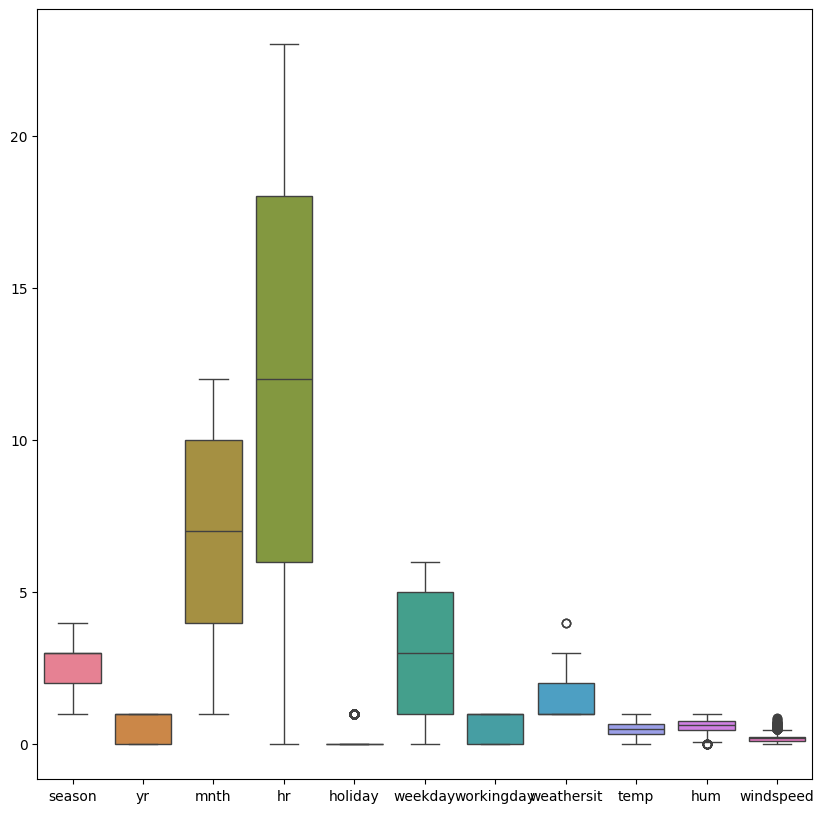

In [ ]:
plt.figure(figsize=(10,10))
sns.boxplot(df.drop("cnt", axis=1))

{'whiskers': [<matplotlib.lines.Line2D at 0x7d679fe26ba0>,
 'caps': [<matplotlib.lines.Line2D at 0x7d679fe27140>,
 'boxes': [<matplotlib.lines.Line2D at 0x7d679fe268a0>],
 'medians': [<matplotlib.lines.Line2D at 0x7d679fe27710>],
 'fliers': [<matplotlib.lines.Line2D at 0x7d679fe279e0>],
 'means': []}

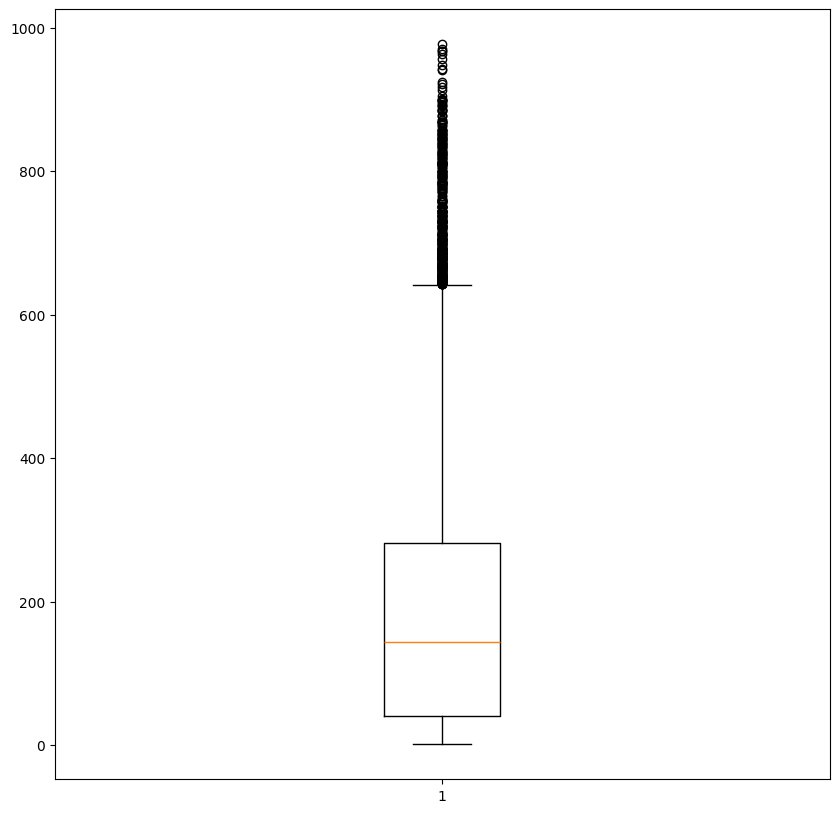

In [ ]:
plt.figure(figsize=(10,10))
plt.boxplot(df["cnt"])

<Axes: ylabel='windspeed'>

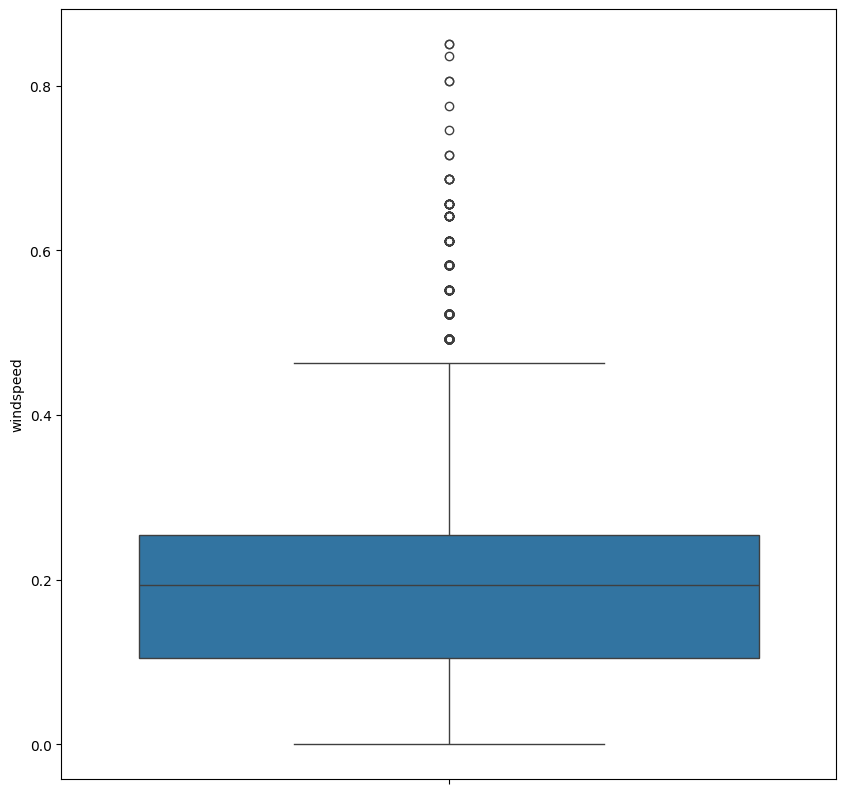

In [ ]:
plt.figure(figsize=(10,10))
sns.boxplot(df["windspeed"])

In [ ]:
df.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,2,1,6,9,0,6,0,1,0.60,0.60,0.0896,367
1,2,0,3,11,0,2,1,1,0.44,0.51,0.3284,86
2,1,0,2,3,0,2,1,2,0.16,0.69,0.0000,2
3,2,0,6,8,0,2,1,1,0.58,0.49,0.3881,486
4,3,1,7,6,1,3,0,1,0.66,0.69,0.0000,32


Vediamo se ce un utilizzo piu alto per alcuni giorni ma sembra abbastanza stabile e indipendente dall giorno

In [ ]:
df.groupby("weekday")["cnt"].sum().head(10)

,cnt
weekday,
0,357151
1,365854
2,366164
3,380912
4,383145
5,397674
6,389413


<Axes: xlabel='weekday', ylabel='cnt'>

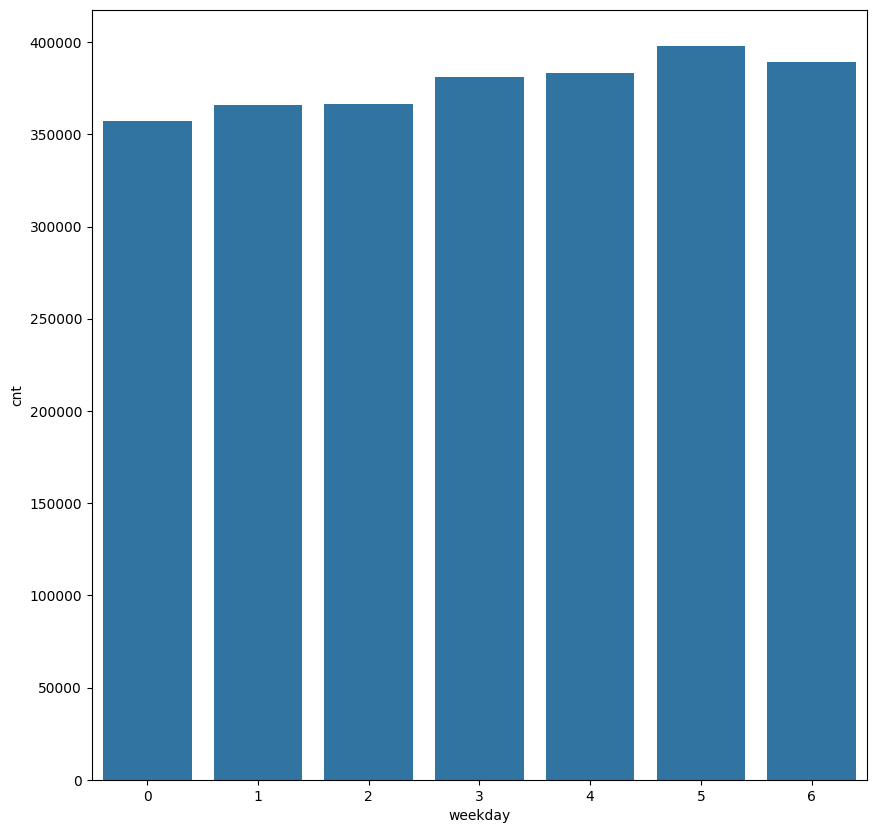

In [ ]:
plt.figure(figsize=(10,10))
sns.barplot(df.groupby("weekday")["cnt"].sum())

In [ ]:
q1 = df["cnt"].quantile(0.25)
q3 = df["cnt"].quantile(0.75)
iqr = q3 - q1
upper = q3 + 1.5 * iqr
lower = q1 - 1.5 * iqr


In [ ]:
df.head()


,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,2,1,6,9,0,6,0,1,0.60,0.60,0.0896,367
1,2,0,3,11,0,2,1,1,0.44,0.51,0.3284,86
2,1,0,2,3,0,2,1,2,0.16,0.69,0.0000,2
3,2,0,6,8,0,2,1,1,0.58,0.49,0.3881,486
4,3,1,7,6,1,3,0,1,0.66,0.69,0.0000,32


In [ ]:
print(upper)

642.5


notiamo 410 record con count sopra 410

In [ ]:
filltered = df[(df["cnt"] > upper)]
filltered.sort_values(by="cnt", ascending=False ).head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
4866,3,1,9,18,0,3,1,1,0.66,0.44,0.2537,977
10419,3,1,9,17,0,2,1,1,0.70,0.28,0.0000,970
10504,3,1,9,18,0,1,1,1,0.62,0.35,0.2985,968
9190,4,1,9,17,0,2,1,1,0.66,0.39,0.2836,967
9781,4,1,10,17,0,3,1,1,0.66,0.47,0.0000,963


In [ ]:
filltered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 410 entries, 10 to 13888
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      410 non-null    int64  
 1   yr          410 non-null    int64  
 2   mnth        410 non-null    int64  
 3   hr          410 non-null    int64  
 4   holiday     410 non-null    int64  
 5   weekday     410 non-null    int64  
 6   workingday  410 non-null    int64  
 7   weathersit  410 non-null    int64  
 8   temp        410 non-null    float64
 9   hum         410 non-null    float64
 10  windspeed   410 non-null    float64
 11  cnt         410 non-null    int64  
dtypes: float64(3), int64(9)
memory usage: 41.6 KB


In [ ]:
df.sort_values(by="windspeed", ascending=False ).head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
2950,3,0,7,17,0,0,0,3,0.80,0.49,0.8507,358
5831,3,0,7,18,0,0,0,3,0.80,0.49,0.8507,181
9681,3,0,8,17,0,6,0,3,0.64,0.89,0.8358,16
699,1,1,2,21,0,5,1,1,0.42,0.35,0.8060,152
8367,1,0,2,15,0,5,1,1,0.46,0.41,0.8060,55


## Min max cnt

notiamo i massimi e in particolare il minimo che il modello puo predirre ( non deve predirre numeri negativi perche non e possibile che un giorno vengano affittate -1 bici)

In [ ]:
df["cnt"].max()

977

In [ ]:
df["cnt"].min()

1

In [ ]:
q2 = df["cnt"].quantile(0.50)

Valore piu comune del dataset 5 per cnt

In [ ]:
df["cnt"].mode()

,cnt
0,5


In [ ]:
print(q2)

143.0


# Encoding

## Aggiungi giorno della settimana

Parte fatta per aumentare la comprensione dei dati ma non necessaria per migliorare il modello

In [ ]:
day_map = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}
df_weekday = df.copy()
df_weekday.head()


,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,2,1,6,9,0,6,0,1,0.60,0.60,0.0896,367
1,2,0,3,11,0,2,1,1,0.44,0.51,0.3284,86
2,1,0,2,3,0,2,1,2,0.16,0.69,0.0000,2
3,2,0,6,8,0,2,1,1,0.58,0.49,0.3881,486
4,3,1,7,6,1,3,0,1,0.66,0.69,0.0000,32


In [ ]:
df_weekday["weekday"] = df_weekday["weekday"].map(day_map)
df_weekday.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,2,1,6,9,0,Sunday,0,1,0.60,0.60,0.0896,367
1,2,0,3,11,0,Wednesday,1,1,0.44,0.51,0.3284,86
2,1,0,2,3,0,Wednesday,1,2,0.16,0.69,0.0000,2
3,2,0,6,8,0,Wednesday,1,1,0.58,0.49,0.3881,486
4,3,1,7,6,1,Thursday,0,1,0.66,0.69,0.0000,32


## Aggiungi stagione

In [ ]:
season_map = {
 1: "inverno",
 2: "primavera",
 3: "estate",
 4: "autunno"
}

In [ ]:
df_weekday["season"] = df_weekday["season"].map(season_map)
df_weekday.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,primavera,1,6,9,0,Sunday,0,1,0.60,0.60,0.0896,367
1,primavera,0,3,11,0,Wednesday,1,1,0.44,0.51,0.3284,86
2,inverno,0,2,3,0,Wednesday,1,2,0.16,0.69,0.0000,2
3,primavera,0,6,8,0,Wednesday,1,1,0.58,0.49,0.3881,486
4,estate,1,7,6,1,Thursday,0,1,0.66,0.69,0.0000,32


## Aggiungi anno

In [ ]:
anno_map = {
    0: "2011",
    1: "2012"
}

In [ ]:
df_weekday["yr"] = df_weekday["yr"].map(anno_map)
df_weekday.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,primavera,2012,6,9,0,Sunday,0,1,0.60,0.60,0.0896,367
1,primavera,2011,3,11,0,Wednesday,1,1,0.44,0.51,0.3284,86
2,inverno,2011,2,3,0,Wednesday,1,2,0.16,0.69,0.0000,2
3,primavera,2011,6,8,0,Wednesday,1,1,0.58,0.49,0.3881,486
4,estate,2012,7,6,1,Thursday,0,1,0.66,0.69,0.0000,32


## Aggiungi weathersit

In [ ]:
weathersit_map = {
    1: "chiaro",
    2: "nuvoloso",
    3: "pioggia/neve",
    4: "tempesta"
}


In [ ]:
df_weekday["weathersit"] = df_weekday["weathersit"].map(weathersit_map)
df_weekday.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,primavera,2012,6,9,0,Sunday,0,chiaro,0.60,0.60,0.0896,367
1,primavera,2011,3,11,0,Wednesday,1,chiaro,0.44,0.51,0.3284,86
2,inverno,2011,2,3,0,Wednesday,1,nuvoloso,0.16,0.69,0.0000,2
3,primavera,2011,6,8,0,Wednesday,1,chiaro,0.58,0.49,0.3881,486
4,estate,2012,7,6,1,Thursday,0,chiaro,0.66,0.69,0.0000,32


## One hot for week days

one hot che ho usato tanto ma che alla fine e risultato poco utile per i modelli in questo caso

In [ ]:
df_one_hot = pd.get_dummies(df_weekday, columns=["weekday"])

In [ ]:
df_one_hot.head()

,season,yr,mnth,hr,holiday,workingday,weathersit,temp,hum,windspeed,cnt,weekday_Friday,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday
0,primavera,2012,6,9,0,0,chiaro,0.60,0.60,0.0896,367,False,False,False,True,False,False,False
1,primavera,2011,3,11,0,1,chiaro,0.44,0.51,0.3284,86,False,False,False,False,False,False,True
2,inverno,2011,2,3,0,1,nuvoloso,0.16,0.69,0.0000,2,False,False,False,False,False,False,True
3,primavera,2011,6,8,0,1,chiaro,0.58,0.49,0.3881,486,False,False,False,False,False,False,True
4,estate,2012,7,6,1,0,chiaro,0.66,0.69,0.0000,32,False,False,False,False,True,False,False


# Normalizazione

Dataset gia normalizato...

Anche se poi in molti modelli ho applicato inutilmente la normalizazione perche tra una volta e l'altra che ho lavorato sul progetto mi sono dimenticato della cosa...

ho anche provato a normalizare fearure non normalizate come hr, mnth e weekday ma per i modelli a albero la normalizazione non e necessaria

# Train test split


test train split fatto per la magiormarte su 0.2 ma poi ho testato 0.15 e ho notato un bun miglioramento senza cadere in un overfitting troppo forte

In [ ]:
x = df.drop("cnt", axis=1)
y = df["cnt"]

In [ ]:
train_x, test_x, train_y, test_y = train_test_split(x, y,  test_size=0.15, random_state=42)


# Target encoding

Target encoding fa una media del target e lo incoda al posto della "caregoria"

In [ ]:
encoder = ce.TargetEncoder(cols=categoriche)
X_train_encoded = encoder.fit_transform (train_x, train_y)
X_test_encoded = encoder.transform(test_x)

In [ ]:
X_train_encoded.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed
573,238.636213,1,7,14,0,4,1,204.226704,0.78,0.33,0.2239
10263,198.225795,1,10,4,0,6,0,204.226704,0.44,0.72,0.0000
3821,198.225795,1,11,3,0,0,0,204.226704,0.22,0.44,0.0000
3207,208.750670,1,5,16,0,3,1,115.436605,0.70,0.61,0.0896
7109,208.750670,0,5,17,0,3,1,204.226704,0.60,0.69,0.1343


# Linear regression


## Primo test - baseline

beseline model

Questo e il modello che mi dice quando e il "minimo" che posso fare per avere un metodo di paragone

In [ ]:
model = LinearRegression()

model.fit(train_x, train_y)

pred_y = model.predict(test_x)

In [ ]:
r2(test_y, pred_y)

0.4035590027605903

In [ ]:
MSE(test_y, pred_y)

19982.440909306915

senza encoding:

RMSE = 141.9616450087312

MSE = 20153.108653585015

R2 = 0.39910511114403346

In [ ]:
RMSE(test_y, pred_y)

141.35926184480067

### Agginta di one hot per i week day

In [ ]:
"""
x = df_one_hot.drop("cnt", axis=1)
y = df_one_hot["cnt"]
train_x, test_x, train_y, test_y = train_test_split(x, y,  test_size=0.2, random_state=42)
"""

'\nx = df_one_hot.drop("cnt", axis=1)\ny = df_one_hot["cnt"]\ntrain_x, test_x, train_y, test_y = train_test_split(x, y,  test_size=0.2, random_state=42)\n'

In [ ]:
"""
model = LinearRegression()

model.fit(train_x, train_y)

pred_y = model.predict(test_x)
"""

'\nmodel = LinearRegression()\n\nmodel.fit(train_x, train_y)\n\npred_y = model.predict(test_x)\n'

In [ ]:

"""
RMSE(test_y, pred_y)
"""

'\nRMSE(test_y, pred_y)\n'

## Secondo test - Pipeline, Scaler e One Hot

usato lo scaler in questo caso come detto nella sezione sulla normalizazione perche mi ero dimenticato che era normalizato tra l'altro avenfo feature che andavano da 0-1 (come yr) era meglio usare minmaxscaler

Pipelime permette di usare piu funzioni in sequenza autput di uno input del altro

In [ ]:
df_weekday.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,primavera,2012,6,9,0,Sunday,0,chiaro,0.60,0.60,0.0896,367
1,primavera,2011,3,11,0,Wednesday,1,chiaro,0.44,0.51,0.3284,86
2,inverno,2011,2,3,0,Wednesday,1,nuvoloso,0.16,0.69,0.0000,2
3,primavera,2011,6,8,0,Wednesday,1,chiaro,0.58,0.49,0.3881,486
4,estate,2012,7,6,1,Thursday,0,chiaro,0.66,0.69,0.0000,32


In [ ]:
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown="ignore")

trasformatore funziona in parallelo non come il pipeline

In [ ]:
preprocesor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeriche),
        ("cat", categorical_transformer, categoriche)
    ]
)

In [ ]:
model = Pipeline(steps=[("preprocessing", preprocesor), ("model", LinearRegression())])
model.fit(train_x, train_y)
pred_y = model.predict(test_x)

In [ ]:
RMSE(test_y, pred_y)

139.68287205776056

## Terzo test - Pipeline, Scaler, One-Hot e PolynomialFeatures (degree=2)

Usato il PolynomialFeatures per passare da un modello lineare a un modello polinomiale e quindi giocare con un modello piu potente

In [ ]:
numeric_transformer = Pipeline(steps = [("scaler", StandardScaler()), ("poly", PolynomialFeatures(degree=2))])

In [ ]:
preprocesor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeriche),
        ("cat", categorical_transformer, categoriche)
    ]
)

In [ ]:
model = Pipeline(steps=[("preprocessing", preprocesor), ("model", LinearRegression())])
model.fit(train_x, train_y)
pred_y = model.predict(test_x)

In [ ]:
RMSE(test_y, pred_y)

121.60775913473668

# Ridge

## Primo test - baseline

In [ ]:
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown="ignore")

In [ ]:
preprocesor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeriche),
        ("cat", categorical_transformer, categoriche)
    ]
)

In [ ]:
model = Pipeline(steps=[("preprocessing", preprocesor), ("model", Ridge(alpha=1, max_iter=10000))])
model.fit(train_x, train_y)
pred_y = model.predict(test_x)

In [ ]:
RMSE(test_y, pred_y)

139.683817532216

## Secondo test


In [ ]:
numeric_transformer = Pipeline(steps = [("scaler", StandardScaler()), ("poly", PolynomialFeatures(degree=2))])

In [ ]:
preprocesor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeriche),
        ("cat", categorical_transformer, categoriche)
    ]
)

In [ ]:
model = Pipeline(steps=[("preprocessing", preprocesor), ("model", Ridge(alpha=1, max_iter=10000))])
model.fit(train_x, train_y)
pred_y = model.predict(test_x)

In [ ]:
RMSE(test_y, pred_y)

121.60748876421918

# Lasso

## Primo test - baseline

In [ ]:
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown="ignore")

In [ ]:
preprocesor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeriche),
        ("cat", categorical_transformer, categoriche)
    ]
)

In [ ]:
model = Pipeline(steps=[("preprocessing", preprocesor), ("model", Lasso(alpha=0.1, max_iter=10000))])
model.fit(train_x, train_y)
pred_y = model.predict(test_x)

In [ ]:
RMSE(test_y, pred_y)

139.7134433582207

## Secondo test



In [ ]:
numeric_transformer = Pipeline(steps = [("scaler", StandardScaler()), ("poly", PolynomialFeatures(degree=2))])

In [ ]:
preprocesor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeriche),
        ("cat", categorical_transformer, categoriche)
    ]
)

In [ ]:
model = Pipeline(steps=[("preprocessing", preprocesor), ("model", Lasso(alpha=0.1, max_iter=10000))])
model.fit(train_x, train_y)
pred_y = model.predict(test_x)

In [ ]:
for i in pred_y:
  if i < 0:
    print(i)

-26.362661456294006
-174.03959768543837
-26.385504011578405
-119.66771374557413
-13.423809950186126
-56.510336664023725
-30.558512448399597
-4.162945897289433
-77.06925134680318
-50.01959802099498
-78.06710553533509
-89.06923346725625
-53.32744374704066
-4.812903633050723
-20.75926918888547
-47.81228630882174
-77.47739685814065
-61.5984106304702
-2.666647259021829
-23.026056683822787
-134.10400174755193
-74.86164345619392
-12.797550059537741
-25.220172818316144
-37.36540512931299
-36.514228112532635
-4.722783001836774
-12.995432321510862
-9.97263818095729
-27.44458602929069
-14.91914714770769
-19.84431479342595
-18.317834312459638
-50.71092965100115
-73.34295002828475
-101.005354989267
-92.37073951886106
-45.81326579068957
-40.68056932759464
-99.69707070032422
-82.33608994921104
-72.12589881078418
-31.04400388353872
-108.2764221101873
-43.99910685032563
-19.06922119674931
-133.11661690424575
-36.811748883093
-126.70294591734404
-23.07750252388513
-76.60094235121016
-100.07191912791455


Realizzo che il modello produceva risultati negativi che so che non possono essere giusti quindi gli aggiustiamo mettendoli alla moda

In [ ]:
for i in range(len(pred_y)):
  if pred_y[i] < 0:
    pred_y[i] = 5

In [ ]:
RMSE(test_y, pred_y)

118.8314267210281

## Terzo test - Prova cross-validation

In [ ]:
numeric_transformer = Pipeline(steps = [("poly", PolynomialFeatures(degree=2))])

In [ ]:
preprocesor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeriche),
        ("cat", categorical_transformer, categoriche)
    ]
)

In [ ]:
model = Pipeline(steps=[("preprocessing", preprocesor), ("model", Lasso(alpha=0.1, max_iter=10000))])

In [ ]:
rmse_scorer = make_scorer(RMSE, greater_is_better=False)

cv = KFold(n_splits=5, shuffle=True, random_state=42)


In [ ]:
param_distributions = {
    "model__alpha": loguniform(0.0001, 0.01),
    "preprocessing__num__poly__degree": randint(5, 6)
}


In [ ]:
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_distributions,
    n_iter=30,
    scoring=rmse_scorer,
    cv=cv,
    n_jobs=-1,
    random_state=42
)

In [ ]:
"""
random_search.fit(train_x, train_y)


print("Best CV RMSE:", -random_search.best_score_)
print("Best parameters:", random_search.best_params_)

best_model = random_search.best_estimator_
pred_y = best_model.predict(test_x)
final_rmse = RMSE(test_y, pred_y)
print("Test RMSE:", final_rmse)
"""

'\nrandom_search.fit(train_x, train_y)\n\n\nprint("Best CV RMSE:", -random_search.best_score_)\nprint("Best parameters:", random_search.best_params_)\n\nbest_model = random_search.best_estimator_\npred_y = best_model.predict(test_x)\nfinal_rmse = RMSE(test_y, pred_y)\nprint("Test RMSE:", final_rmse)\n'

Best CV RMSE: 116.10340312198461

Best parameters: {'model__alpha': np.float64(0.11400863701127326), 'preprocessing__num__poly__degree': 4}

Test RMSE: 114.8293704472543

Best CV RMSE: 99.0853382375277

Best parameters: {'model__alpha': np.float64(0.0029106359131330704), 'preprocessing__num__poly__degree': 5}

Test RMSE: 99.03372863991275


## Quarto test - MinMaxscaler

In [ ]:
numeric_transformer = Pipeline(steps = [("scaler", MinMaxScaler()), ("poly", PolynomialFeatures(degree=2))])

In [ ]:
preprocesor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeriche),
        ("cat", categorical_transformer, categoriche)
    ]
)

In [ ]:
model = Pipeline(steps=[("preprocessing", preprocesor), ("model", Lasso(alpha=0.1, max_iter=10000))])
model.fit(train_x, train_y)
pred_y = model.predict(test_x)

In [ ]:
RMSE(test_y, pred_y)

122.10570547222873

## Quinto test - Robust scaler

In [ ]:
numeric_transformer = Pipeline(steps = [("scaler", RobustScaler()), ("poly", PolynomialFeatures(degree=2))])

In [ ]:
preprocesor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeriche),
        ("cat", categorical_transformer, categoriche)
    ]
)

In [ ]:
model = Pipeline(steps=[("preprocessing", preprocesor), ("model", Lasso(alpha=0.1, max_iter=10000))])
model.fit(train_x, train_y)
pred_y = model.predict(test_x)

In [ ]:
RMSE(test_y, pred_y)

121.65493633632742

## Sesto test - target encoding


target encoding alla fine inplementato su un altro modello

In [ ]:
df.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,2,1,6,9,0,6,0,1,0.60,0.60,0.0896,367
1,2,0,3,11,0,2,1,1,0.44,0.51,0.3284,86
2,1,0,2,3,0,2,1,2,0.16,0.69,0.0000,2
3,2,0,6,8,0,2,1,1,0.58,0.49,0.3881,486
4,3,1,7,6,1,3,0,1,0.66,0.69,0.0000,32


In [ ]:
df_target_encoding = df.copy()

In [ ]:
df_target_encoding.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,2,1,6,9,0,6,0,1,0.60,0.60,0.0896,367
1,2,0,3,11,0,2,1,1,0.44,0.51,0.3284,86
2,1,0,2,3,0,2,1,2,0.16,0.69,0.0000,2
3,2,0,6,8,0,2,1,1,0.58,0.49,0.3881,486
4,3,1,7,6,1,3,0,1,0.66,0.69,0.0000,32


In [ ]:

encoder = ColumnTransformer(transformers = [
        ("cat", TargetEncoder(), categoriche),
        ("num", "passthrough", numeriche)
    ],
    remainder = "drop"
  )

model = Pipeline(steps=[
    ("encoding", encoder),
    ("scaler_poly", PolynomialFeatures(degree=2, include_bias=False)),
    ("model", Lasso(alpha=0.1, max_iter=10000))
])



In [ ]:
"""
model.fit(test_x, test_y)
pred_y = model.predict(test_x)
"""

'\nmodel.fit(test_x, test_y)\npred_y = model.predict(test_x)\n'

In [ ]:
rmse_scorer = make_scorer(RMSE, greater_is_better=False)

cv = KFold(n_splits=5, shuffle=True, random_state=42)


In [ ]:
param_distributions = {
    "model__alpha": loguniform(0.05, 0.2),
    "scaler_poly__poly__degree": randint(2, 6)
}


In [ ]:
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_distributions,
    n_iter=20,
    scoring=rmse_scorer,
    n_jobs=-1,
    cv=cv,
    random_state=42
)

In [ ]:
"""
random_search.fit(train_x, train_y)


print("Best CV RMSE:", -random_search.best_score_)
print("Best parameters:", random_search.best_params_)

best_model = random_search.best_estimator_
pred_y = best_model.predict(test_x)
final_rmse = RMSE(test_y, pred_y)
print("Test RMSE:", final_rmse)
"""

'\nrandom_search.fit(train_x, train_y)\n\n\nprint("Best CV RMSE:", -random_search.best_score_)\nprint("Best parameters:", random_search.best_params_)\n\nbest_model = random_search.best_estimator_\npred_y = best_model.predict(test_x)\nfinal_rmse = RMSE(test_y, pred_y)\nprint("Test RMSE:", final_rmse)\n'

# ElasticNet

Elasticnet e una via di mezzo tra lasso e ridge

## Primo test - baseline


In [ ]:
preprocesor = ColumnTransformer(
    transformers=[
        ("num", "passthrough", numeriche),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categoriche)
    ]
)

In [ ]:
model = Pipeline(steps=[("preprocessing", preprocesor), ("model", ElasticNet(alpha=1.0, l1_ratio=0.5, max_iter=10000))])
model.fit(train_x, train_y)
pred_y = model.predict(test_x)

In [ ]:
RMSE(test_y, pred_y)

158.37735308175476

# Tree Regressor

Non necessita normalizazione e questo vale anche per i modelli dopo.

## Promo test - baseline

In [ ]:
tree_model = DecisionTreeRegressor(
    max_depth= 100,
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42
)

In [ ]:
model = Pipeline(steps=[("preprocessing", preprocesor), ("model", tree_model)])
model.fit(train_x, train_y)
pred_y = model.predict(test_x)

In [ ]:
RMSE(test_y, pred_y)

55.931668642984874

# Random Forest Regressor

## Primo test - baseline

In [ ]:
forest_model = RandomForestRegressor(
    n_estimators=200,
    max_depth=100,
    min_samples_split=10,
    min_samples_leaf=5,
    n_jobs=-1,
    random_state=42
)


In [ ]:
model = Pipeline(steps=[("preprocessing", preprocesor), ("model", forest_model)])
model.fit(train_x, train_y)
pred_y = model.predict(test_x)

In [ ]:
RMSE(test_y, pred_y)

46.94177699466619

## Secondo test

In [ ]:
model = RandomForestRegressor(
    n_estimators=500,
    max_depth=100,
    min_samples_split=5,
    min_samples_leaf=2,
    n_jobs=-1,
    random_state=42
)

In [ ]:
modelcv = GridSearchCV

In [ ]:
model.fit(train_x, train_y)
pred_y = model.predict(test_x)

In [ ]:
RMSE(test_y, pred_y)

44.63864267111953

In [ ]:
print((np.sqrt(mean_squared_log_error(pred_y, test_y))))

0.364825697588359


# LGBMRegresoor

## Primo test - Baseline

In [ ]:
model = LGBMRegressor(
    n_estimators=500,
    max_depth=100,
    min_samples_split=5,
    min_samples_leaf=2,
    n_jobs=-1,
    random_state=42
    )

model.fit(train_x, train_y, categorical_feature=categoriche)
pred_y = model.predict(test_x)

[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=2. Current value: min_data_in_leaf=2
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=2. Current value: min_data_in_leaf=2
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.015688 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 219
[LightGBM] [Info] Number of data points in the train set: 11817, number of used features: 11
[LightGBM] [Info] Start training from score 189.897605
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=2. Current value: min_data_in_leaf=2
[LightGBM] [Warning] Unknown parameter: min_samples_split


In [ ]:
for i in range(len(pred_y)):
    if pred_y[i] < 0:
      pred_y[i] = 1

In [ ]:
RMSE(test_y, pred_y)

37.20416979859877

In [ ]:
r2(test_y, pred_y)

0.9586855299897313

### Importanza feature

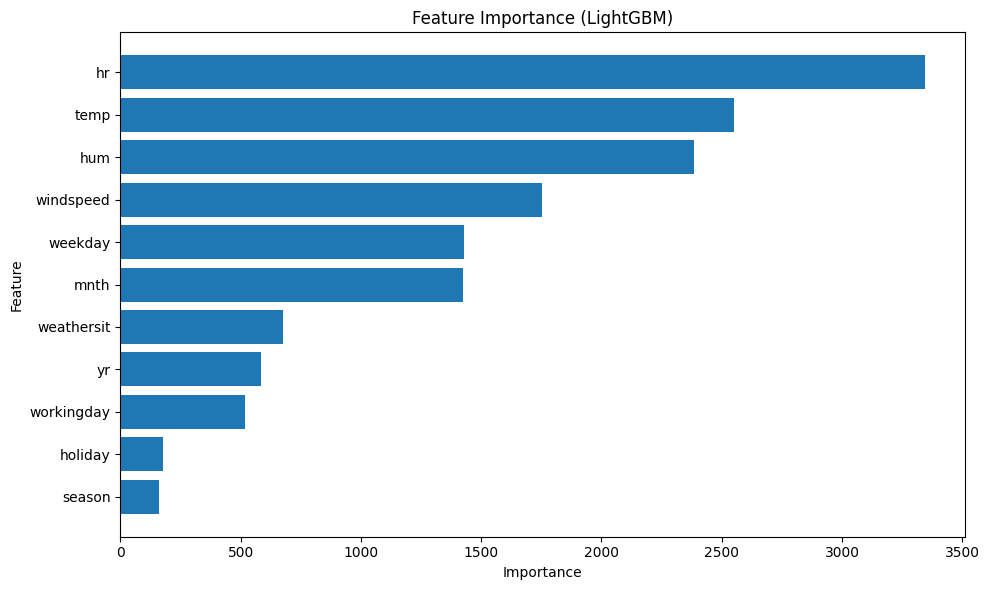

In [ ]:
importances = model.feature_importances_
features = train_x.columns

feat_importances = pd.DataFrame({
    'Feature': features,
    'Importance': importances
})

feat_importances = feat_importances.sort_values(by="Importance", ascending=False)


plt.figure(figsize=(10, 6))
plt.barh(feat_importances['Feature'], feat_importances['Importance'])
plt.gca().invert_yaxis()
plt.title("Feature Importance (LightGBM)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


In [ ]:
len(train_y.tolist())

11817

In [ ]:
for i in range(0, len(train_y.tolist())):
    if train_y.tolist()[i] < 0:
      print(pred_y.tolist()[i])

In [ ]:
for i in range(len(pred_y)):
    if pred_y[i] < 0:
      print(pred_y[i])

## Secondo test - Cross validation

In [ ]:
"neg_root_mean_squared_error"

'neg_root_mean_squared_error'

In [ ]:
"""
    n_estimators=500,
    max_depth=100,
    min_samples_split=5,
    min_samples_leaf=2,
    n_jobs=-1,
    random_state=42
"""

param_grid = {
  "n_estimators": [700, 800, 900],
  "learning_rate": [0.03, 0.05, 0.7],
  "min_samples_split": [1],
  "min_samples_leaf": [3, 4, 5],
  "max_depth": [20, 40, 60]
}

model = LGBMRegressor(
    n_jobs=-1,
    random_state=42
    )

grid_search = GridSearchCV(
    model,
    param_grid,
    cv=5,
    scoring="neg_root_mean_squared_error",
    n_jobs = -1,
    )
"""
grid_search.fit(train_x, train_y)

"""

'\ngrid_search.fit(train_x, train_y)\n\n'

In [ ]:
prova = {'learning_rate': 0.1,
 'max_depth': 80,
 'min_samples_leaf': 4,
 'min_samples_split': 1,
 'n_estimators': 600}

In [ ]:
prova2 = {
'learning_rate': 0.1,
'max_depth': 80,
'min_samples_leaf': 4,
'min_samples_split': 2,
'n_estimators': 550
}

## Terzo test

In [ ]:
df.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,2,1,6,9,0,6,0,1,0.60,0.60,0.0896,367
1,2,0,3,11,0,2,1,1,0.44,0.51,0.3284,86
2,1,0,2,3,0,2,1,2,0.16,0.69,0.0000,2
3,2,0,6,8,0,2,1,1,0.58,0.49,0.3881,486
4,3,1,7,6,1,3,0,1,0.66,0.69,0.0000,32


In [ ]:
model = LGBMRegressor(
    n_estimators = 800,
    max_depth = 20,
    min_samples_split = 1,
    min_samples_leaf = 4,
    learning_rate = 0.05,
    n_jobs = -1,
    random_state = 42
    )

model.fit(train_x, train_y, categorical_feature=categoriche)
pred_y = model.predict(test_x)

[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=4. Current value: min_data_in_leaf=4
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=4. Current value: min_data_in_leaf=4
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014127 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 219
[LightGBM] [Info] Number of data points in the train set: 11817, number of used features: 11
[LightGBM] [Info] Start training from score 189.897605
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=4. Current value: min_data_in_leaf=4
[LightGBM] [Warning] Unknown para

In [ ]:
for i in range(len(pred_y)):
    if pred_y[i] < 0:
      pred_y[i] = 5

In [ ]:
RMSE(test_y, pred_y)

37.19531505727322

## Test quatro

In [ ]:
df.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,2,1,6,9,0,6,0,1,0.60,0.60,0.0896,367
1,2,0,3,11,0,2,1,1,0.44,0.51,0.3284,86
2,1,0,2,3,0,2,1,2,0.16,0.69,0.0000,2
3,2,0,6,8,0,2,1,1,0.58,0.49,0.3881,486
4,3,1,7,6,1,3,0,1,0.66,0.69,0.0000,32


In [ ]:

model = LGBMRegressor(
    n_estimators = 1100,
    objective='tweedie',
    max_depth = 10,
    max_level = 25,
    min_samples_split = 1,
    min_samples_leaf = 6,
    learning_rate = 0.06,
    n_jobs = -1,
    random_state = 42
    )

model.fit(train_x, train_y) #categorical_feature=categoriche
pred_y = model.predict(test_x)

[LightGBM] [Warning] Unknown parameter: max_level
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=6. Current value: min_data_in_leaf=6
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] Unknown parameter: max_level
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=6. Current value: min_data_in_leaf=6
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001466 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 220
[LightGBM] [Info] Number of data points in the train set: 11817, number of used features: 11
[LightGBM] [Info] Start training from score 5.246485
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGB

In [ ]:
for i in range(len(pred_y)):
    if pred_y[i] < 0:
      pred_y[i] = 5

In [ ]:
RMSE(test_y, pred_y)

35.72964956100643

In [ ]:
RMSE(train_y, model.predict(train_x))

[LightGBM] [Warning] Unknown parameter: max_level
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=6. Current value: min_data_in_leaf=6
[LightGBM] [Warning] Unknown parameter: min_samples_split


21.601679123320825

## Test cinque - Target encoded

In [ ]:
model = LGBMRegressor(
    n_estimators = 1100,
    objective='tweedie',
    max_depth = 10,
    max_level = 25,
    min_samples_split = 1,
    min_samples_leaf = 6,
    learning_rate = 0.06,
    n_jobs = -1,
    random_state = 42
    )

model.fit(X_train_encoded, train_y)
pred_y = model.predict(X_test_encoded)

[LightGBM] [Warning] Unknown parameter: max_level
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=6. Current value: min_data_in_leaf=6
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] Unknown parameter: max_level
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=6. Current value: min_data_in_leaf=6
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000542 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 220
[LightGBM] [Info] Number of data points in the train set: 11817, number of used features: 11
[LightGBM] [Info] Start training from score 5.246485
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGB

In [ ]:
RMSE(test_y, pred_y)

36.22133987657216

In [ ]:
RMSE(train_y, model.predict(X_train_encoded))

[LightGBM] [Warning] Unknown parameter: max_level
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=6. Current value: min_data_in_leaf=6
[LightGBM] [Warning] Unknown parameter: min_samples_split


21.908113951031286

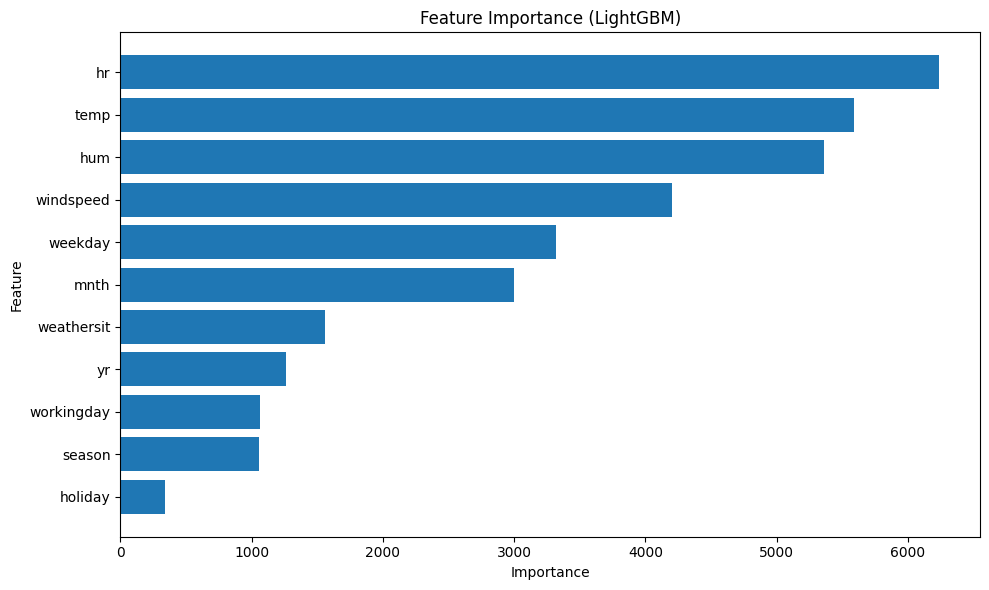

In [ ]:
importances = model.feature_importances_
features = train_x.columns

feat_importances = pd.DataFrame({
    'Feature': features,
    'Importance': importances
})

feat_importances = feat_importances.sort_values(by="Importance", ascending=False)


plt.figure(figsize=(10, 6))
plt.barh(feat_importances['Feature'], feat_importances['Importance'])
plt.gca().invert_yaxis()
plt.title("Feature Importance (LightGBM)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

## Test sei - categoria

diciamo al modello quali sono le categorie e lui gestisce per conto suo

tweedie serve per dire al modello che non puo produrre risultati negativi

In [ ]:
categoriche = ["weathersit", "season"]

model = LGBMRegressor(
    n_estimators = 1100,
    objective='tweedie',
    max_depth = 10,
    max_level = 25,
    min_samples_split = 1,
    min_samples_leaf = 6,
    learning_rate = 0.06,
    n_jobs = -1,
    random_state = 42
    )

model.fit(train_x, train_y, categorical_feature = categoriche) #categorical_feature=categoriche
pred_y = model.predict(test_x)

[LightGBM] [Warning] Unknown parameter: max_level
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=6. Current value: min_data_in_leaf=6
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] Unknown parameter: max_level
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=6. Current value: min_data_in_leaf=6
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000530 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 219
[LightGBM] [Info] Number of data points in the train set: 11817, number of used features: 11
[LightGBM] [Info] Start training from score 5.246485
[LightGBM] [Warning] Unknown parameter: max_level
[LightGBM] [Warning] min_data_in_

In [ ]:
for i in range(len(pred_y)):
    if pred_y[i] < 0:
      pred_y[i] = 5

In [ ]:
RMSE(test_y, pred_y)

35.812879820970686

In [ ]:
RMSE(train_y, model.predict(train_x))

[LightGBM] [Warning] Unknown parameter: max_level
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=6. Current value: min_data_in_leaf=6
[LightGBM] [Warning] Unknown parameter: min_samples_split


21.45765068072843

# XGBoost

## Test uno - Baseline

In [ ]:

model = XGBRegressor(
    n_estimators=600,
    learning_rate=0.06,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    objective='reg:tweedie'
)

model.fit(train_x, train_y)
pred_y = model.predict(test_x)

In [ ]:
RMSE(test_y, pred_y)

35.61323547363281

In [ ]:
RMSE(train_y, model.predict(train_x))

24.667491912841797

In [ ]:
for i in pred_y:
  if i < 0:
    print(i)

## Test due

In [ ]:

model = XGBRegressor(
    n_estimators= 900,
    learning_rate=0.05,
    max_depth= 6,
    subsample=0.7,
    colsample_bytree=0.7,
    random_state=42,
    objective='reg:tweedie'
)

model.fit(train_x, train_y)
pred_y = model.predict(test_x)

In [ ]:
RMSE(test_y, pred_y)

35.08863067626953

In [ ]:
RMSE(train_y, model.predict(train_x))

23.233842849731445

## Test tre - Target encoding

In [ ]:

model = XGBRegressor(
    n_estimators= 900,
    learning_rate=0.05,
    max_depth= 6,
    subsample=0.7,
    colsample_bytree=0.7,
    random_state=42,
    objective='reg:tweedie',
    tree_method='hist'
)

model.fit(X_train_encoded, train_y)
pred_y = model.predict(X_test_encoded)

In [ ]:
RMSE(test_y, pred_y)

34.704063415527344

In [ ]:
RMSE(train_y, model.predict(X_train_encoded))

23.314857482910156

## Test quatro - variabili categoriche

In [ ]:
categorie = ["weathersit", "season"]

In [ ]:
train_x_c = train_x.copy()
test_x_c = test_x.copy()

In [ ]:
train_x_c[categorie] = train_x[categorie].astype('category')
test_x_c[categorie] = test_x[categorie].astype('category')

In [ ]:
#     tree_method='hist'
model = XGBRegressor(
    n_estimators= 900,
    learning_rate=0.05,
    max_depth= 6,
    subsample=0.7,
    colsample_bytree=0.7,
    random_state=42,
    objective='reg:tweedie',
    enable_categorical=True
)

model.fit(train_x_c, train_y)
pred_y = model.predict(test_x_c)

In [ ]:
RMSE(test_y, pred_y)

34.931663513183594

In [ ]:
RMSE(train_y, model.predict(train_x_c))

23.056459426879883

# Catboost

In [ ]:
categorical_cols = ["season","weathersit"] #hr

cat_model = CatBoostRegressor(
    iterations=1800,
    learning_rate=0.05,
    depth=8,
    l2_leaf_reg=3,
    loss_function='RMSE',
    cat_features=categorical_cols,
    random_state=42,
    verbose=200
)

cat_model.fit(train_x, train_y)
y_pred = cat_model.predict(test_x)

0:	learn: 175.5223766	total: 103ms	remaining: 3m 5s
200:	learn: 42.3140568	total: 9.02s	remaining: 1m 11s
400:	learn: 37.0568112	total: 15.2s	remaining: 53.1s
600:	learn: 33.6105739	total: 22.2s	remaining: 44.3s
800:	learn: 31.0879337	total: 27.3s	remaining: 34s
1000:	learn: 29.1688195	total: 30.3s	remaining: 24.2s
1200:	learn: 27.4724912	total: 35.7s	remaining: 17.8s
1400:	learn: 26.1288572	total: 38.7s	remaining: 11s
1600:	learn: 24.9915783	total: 41.8s	remaining: 5.2s
1799:	learn: 24.0122603	total: 44.8s	remaining: 0us


In [ ]:
RMSE(test_y, y_pred)

35.49128079396249

In [ ]:
RMSE(train_y, cat_model.predict(train_x))

25.710293838926614

# Model Staking

## Test uno - Baseline

In [ ]:
lgb_model = LGBMRegressor(
    n_estimators=500,
    learning_rate=0.05,
    num_leaves=31,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

xgb_model = XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    tree_method="hist",
    objective='reg:squarederror',
    enable_categorical=True
)

cat_model = CatBoostRegressor(
    iterations=500,
    learning_rate=0.05,
    depth=6,
    cat_features = categorical_cols,
    verbose=0,
    random_state=42
)

meta_model = Ridge(alpha=1.0)


stacked = StackingRegressor(
    estimators=[('lgb', lgb_model), ('xgb', xgb_model), ('cat', cat_model)],
    final_estimator=meta_model,
    passthrough=True, n_jobs=-1
)


stacked.fit(train_x, train_y)
y_pred = stacked.predict(test_x)

In [ ]:
RMSE(test_y, y_pred)

36.51190946975183

In [ ]:
RMSE(train_y, stacked.predict(train_x))


28.661263113376098

## Test due - LGBMRegrressor, XGRegressor e CatBoostRegressor **Modello finale**

In [ ]:
df.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,2,1,6,9,0,6,0,1,0.60,0.60,0.0896,367
1,2,0,3,11,0,2,1,1,0.44,0.51,0.3284,86
2,1,0,2,3,0,2,1,2,0.16,0.69,0.0000,2
3,2,0,6,8,0,2,1,1,0.58,0.49,0.3881,486
4,3,1,7,6,1,3,0,1,0.66,0.69,0.0000,32


In [ ]:
categorical_cols = ["season","weathersit"]

In [ ]:
train_x[categorie] = train_x[categorie].astype('category')
test_x[categorie] = test_x[categorie].astype('category')

In [ ]:
xgb_model = XGBRegressor(
    n_estimators= 900,
    learning_rate=0.05,
    max_depth= 6,
    subsample=0.7,
    colsample_bytree=0.7,
    random_state=42,
    objective='reg:tweedie',
    enable_categorical=True
)

cat_model = CatBoostRegressor(
    iterations=1800,
    learning_rate=0.05,
    depth=8,
    l2_leaf_reg=3,
    loss_function='RMSE',
    cat_features=categorical_cols,
    random_state=42,
    verbose=200
)

lgb_model = LGBMRegressor(
    n_estimators = 1100,
    objective='tweedie',
    max_depth = 10,
    max_level = 25,
    min_samples_split = 1,
    min_samples_leaf = 6,
    learning_rate = 0.06,
    n_jobs = -1,
    random_state = 42
)


meta_model = Ridge(alpha=1.0)

stacked = StackingRegressor(
    estimators=[('lgb', lgb_model), ('xgb', xgb_model), ('cat', cat_model)],
    final_estimator=meta_model,
    passthrough=True, n_jobs=-1
)

stacked.fit(train_x, train_y)
y_pred = stacked.predict(test_x)



[LightGBM] [Warning] Unknown parameter: max_level
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=6. Current value: min_data_in_leaf=6
[LightGBM] [Warning] Unknown parameter: min_samples_split


In [ ]:
RMSE(test_y, y_pred)

34.091204547155975

In [ ]:
RMSE(train_y, stacked.predict(train_x))


[LightGBM] [Warning] Unknown parameter: max_level
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=6. Current value: min_data_in_leaf=6
[LightGBM] [Warning] Unknown parameter: min_samples_split


22.83559692883904

# **Consegna**

## Preprocessing

In [ ]:
id = df_test["id"]

In [ ]:
df_test.drop(["id", "atemp"], axis=1, inplace=True)

In [ ]:
print(len(id))

3476


In [ ]:
df_test.shape

(3476, 11)

## Modello

In [ ]:
df_test.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed
0,2,1,4,12,0,2,1,1,0.60,0.33,0.3582
1,3,1,6,9,0,4,1,1,0.70,0.54,0.1642
2,2,1,4,11,0,0,0,1,0.46,0.51,0.0000
3,3,1,7,15,0,0,0,1,0.90,0.37,0.2836
4,1,0,1,2,0,4,1,1,0.16,0.64,0.0000


In [ ]:
categorie = ["season","weathersit"]

In [ ]:
df_test[categorie] = df_test[categorie].astype('category')


In [ ]:
df_test.shape

(3476, 11)

In [ ]:
y_pred = stacked.predict(df_test)

[LightGBM] [Warning] Unknown parameter: max_level
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=6. Current value: min_data_in_leaf=6
[LightGBM] [Warning] Unknown parameter: min_samples_split


In [ ]:
submission = pd.DataFrame({
    'id': id,
    'cnt': y_pred
})

submission.to_csv('Isacco_Pironato_ML_Submission.csv)', index=False)